In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy 
from scipy.stats import norm, bernoulli, binom, poisson
import statsmodels.formula.api as sm

In [4]:
buckcsv1 = pd.read_csv("Buckets.csv", dtype={'DataType': str, 'KNN': np.int64, 'Dimensions': np.int64, 'NumPoints': np.int64, 'Time': np.float64, 'Distribution': str})
buckcsv2 = pd.read_csv("Buckets1.csv", dtype={'DataType': str, 'KNN': np.int64, 'Dimensions': np.int64, 'NumPoints': np.int64, 'Time': np.float64, 'Distribution': str})
buckcsv = pd.concat([buckcsv1, buckcsv2])

In [5]:
buckcsv.dtypes

DataType         object
KNN               int64
Dimensions        int64
NumPoints         int64
Time            float64
Distribution     object
dtype: object

In [6]:
kdcsv1 = pd.read_csv("KD.csv", dtype={'DataType': str, 'KNN': np.int64, 'Dimensions': np.int64, 'NumPoints': np.int64, 'Time': np.float64, 'Distribution': str})
kdcsv2 = pd.read_csv("KD1.csv", dtype={'DataType': str, 'KNN': np.int64, 'Dimensions': np.int64, 'NumPoints': np.int64, 'Time': np.float64, 'Distribution': str})
kdcsv = pd.concat([kdcsv1, kdcsv2])


In [7]:
qtcsv1 = pd.read_csv("QT.csv", dtype={'DataType': str, 'KNN': np.int64, 'Dimensions': np.int64, 'NumPoints': np.int64, 'Time': np.float64, 'Distribution': str})
qtcsv2 = pd.read_csv("QT1.csv", dtype={'DataType': str, 'KNN': np.int64, 'Dimensions': np.int64, 'NumPoints': np.int64, 'Time': np.float64, 'Distribution': str})
qtcsv = pd.concat([qtcsv1, qtcsv2])
qtcsv

DataType  KNN  Dimensions  NumPoints      Time Distribution
0   QuadTree    1           2         50  0.000034     Gaussian
1   QuadTree    1           2        100  0.000050     Gaussian
2   QuadTree    1           2        200  0.000052     Gaussian
3   QuadTree    1           2        400  0.000032     Gaussian
4   QuadTree    1           2        800  0.000047     Gaussian
5   QuadTree    1           2       1600  0.000043     Gaussian
6   QuadTree    1           2       3200  0.000042     Gaussian
7   QuadTree    1           2       6400  0.000047     Gaussian
8   QuadTree    1           2      12800  0.000036     Gaussian
9   QuadTree    1           2      25600  0.000036     Gaussian
10  QuadTree    1           2      51200  0.000025     Gaussian
11  QuadTree    2           2         50  0.000031     Gaussian
12  QuadTree    2           2        100  0.000033     Gaussian
13  QuadTree    2           2        200  0.000031     Gaussian
14  QuadTree    2           2        400  0.000034     Gaussian
15  QuadTree    2           2        800  0.000028     Gaussian
16  QuadTree    2           2       1600  0.000031     Gaussian
17  QuadTree    2           2       3200  0.000057     Gaussian
18  QuadTree    2           2       6400  0.000056     Gaussian
19  QuadTree    2           2      12800  0.000047     Gaussian
20  QuadTree    2           2      25600  0.000032     Gaussian
21  QuadTree    2           2      51200  0.000022     Gaussian
22  QuadTree    3           2         50  0.000034     Gaussian
23  QuadTree    3           2        100  0.000042     Gaussian
24  QuadTree    3           2        200  0.000040     Gaussian
25  QuadTree    3           2        400  0.000032     Gaussian
26  QuadTree    3           2        800  0.000032     Gaussian
27  QuadTree    3           2       1600  0.000028     Gaussian
28  QuadTree    3           2       3200  0.000032     Gaussian
29  QuadTree    3           2       6400  0.000050     Gaussian
..       ...  ...         ...        ...       ...          ...
69  QuadTree    7           2        400  0.000036      Uniform
70  QuadTree    7           2        800  0.000033      Uniform
71  QuadTree    7           2       1600  0.000036      Uniform
72  QuadTree    7           2       3200  0.000044      Uniform
73  QuadTree    7           2       6400  0.000038      Uniform
74  QuadTree    7           2      12800  0.000030      Uniform
75  QuadTree    7           2      25600  0.000020      Uniform
76  QuadTree    7           2      51200  0.000021      Uniform
77  QuadTree    8           2         50  0.000019      Uniform
78  QuadTree    8           2        100  0.000024      Uniform
79  QuadTree    8           2        200  0.000023      Uniform
80  QuadTree    8           2        400  0.000029      Uniform
81  QuadTree    8           2        800  0.000024      Uniform
82  QuadTree    8           2       1600  0.000025      Uniform
83  QuadTree    8           2       3200  0.000027      Uniform
84  QuadTree    8           2       6400  0.000031      Uniform
85  QuadTree    8           2      12800  0.000023      Uniform
86  QuadTree    8           2      25600  0.000022      Uniform
87  QuadTree    8           2      51200  0.000025      Uniform
88  QuadTree    9           2         50  0.000035      Uniform
89  QuadTree    9           2        100  0.000021      Uniform
90  QuadTree    9           2        200  0.000029      Uniform
91  QuadTree    9           2        400  0.000023      Uniform
92  QuadTree    9           2        800  0.000025      Uniform
93  QuadTree    9           2       1600  0.000024      Uniform
94  QuadTree    9           2       3200  0.000025      Uniform
95  QuadTree    9           2       6400  0.000027      Uniform
96  QuadTree    9           2      12800  0.000027      Uniform
97  QuadTree    9           2      25600  0.000026      Uniform
98  QuadTree    9           2      51200  0.000025      Uniform

[198 rows x 6 columns]

In [6]:
#the three csv finals are buckcsv (594 lines), kdcsv (594 lines),
# and qtcsv(198 lines)
#df['Data Type', 'Distribution'] = df[dt, dist].applymap(np.str)
# buckcsv['Data Type'] = buckcsv['Data Type'].astype(np.string_)
# buckcsv.dtypes
csv = pd.concat([buckcsv, kdcsv, qtcsv])
csv.dtypes

DataType         object
KNN               int64
Dimensions        int64
NumPoints         int64
Time            float64
Distribution     object
dtype: object

['DataType', 'KNN', 'Dimensions', 'NumPoints', 'Time', 'Distribution']
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0

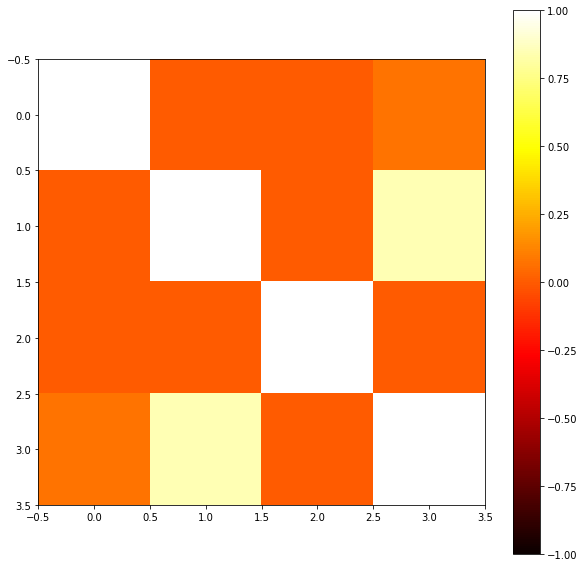

In [7]:
plt.figure(figsize=(10,10))
correlationMatrix = csv.corr()
im = plt.imshow(correlationMatrix, cmap="hot", vmin=-1, vmax=1)
colorBar = plt.colorbar(im)
myList = list(csv)
print(myList)
def numberfyDT(s):
    if (s == 'Bucket'):
        return 0
    elif (s == 'KDTree'):
        return 1
    else: 
        return 2
for row in csv['DataType']:
    row = numberfyDT(row)
    print(row)

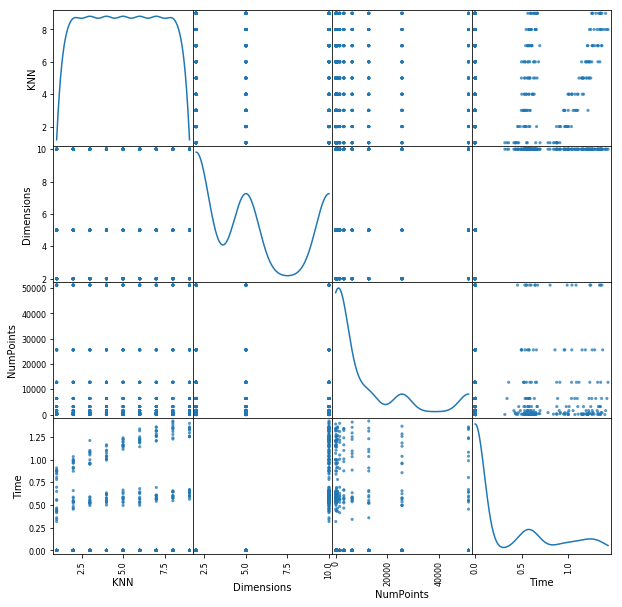

In [8]:
scatterData = csv[['DataType', 'KNN', 'Dimensions', 'NumPoints', 'Time', 'Distribution']]
pd.plotting.scatter_matrix(scatterData, figsize=(10, 10), diagonal='kde')
plt.show()
i = 0
# for row in csv['NumPoints']:
#     i+=1
#     print(i)
#     print (row)

In [9]:
knnToTime = sm.ols(formula='Time ~ DataType + Distribution', data=csv).fit()
knnToTime.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     47.78
Date:                Mon, 02 Jul 2018   Prob (F-statistic):           2.21e-29
Time:                        12:32:30   Log-Likelihood:                -692.88
No. Observations:                1386   AIC:                             1394.
Df Residuals:                    1382   BIC:                             1415.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.2013      0.020     10.275      0.000       0.163       0.240
DataType[T.KDTree]       1.223e-16      0.023   5.27e-15      1.000      -0.045       0.045
DataType[T.QuadTree]       -0.2831      0.033     -8.635      0.000      -0.347      -0.219
Distribution[T.Uniform]     0.1636      0.021      7.624      0.000       0.122       0.206
==============================================================================
Omnibus:                      178.758   Durbin-Watson:                   0.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.156
Skew:                           1.048   Prob(JB):                     6.47e-56
Kurtosis:                       2.916   Cond. No.                         4.21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
timeVsDist = sm.ols(formula='Time ~ Distribution', data=csv).fit()
timeVsDist.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     54.83
Date:                Mon, 02 Jul 2018   Prob (F-statistic):           2.27e-13
Time:                        12:32:30   Log-Likelihood:                -734.34
No. Observations:                1386   AIC:                             1473.
Df Residuals:                    1384   BIC:                             1483.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.1609      0.016     10.295      0.000       0.130       0.192
Distribution[T.Uniform]     0.1636      0.022      7.405      0.000       0.120       0.207
==============================================================================
Omnibus:                      216.126   Durbin-Watson:                   0.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              330.486
Skew:                           1.196   Prob(JB):                     1.72e-72
Kurtosis:                       3.048   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
timeVSDimDT = sm.ols(formula='Time ~ DataType + Dimensions', data=csv).fit()
timeVSDimDT.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     1244.
Date:                Mon, 02 Jul 2018   Prob (F-statistic):               0.00
Time:                        12:32:30   Log-Likelihood:                 145.31
No. Observations:                1386   AIC:                            -282.6
Df Residuals:                    1382   BIC:                            -261.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.3550      0.014    -25.205      0.000      -0.383      -0.327
DataType[T.KDTree]    1.228e-15      0.013    9.7e-14      1.000      -0.025       0.025
DataType[T.QuadTree]     0.1298      0.019      6.747      0.000       0.092       0.168
Dimensions               0.1126      0.002     58.694      0.000       0.109       0.116
==============================================================================
Omnibus:                      104.291   Durbin-Watson:                   0.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.534
Skew:                           0.741   Prob(JB):                     2.02e-28
Kurtosis:                       3.096   Cond. No.                         23.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
timeVSDim = sm.ols(formula='Time ~ Dimensions', data=csv).fit()
timeVSDim.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     3554.
Date:                Mon, 02 Jul 2018   Prob (F-statistic):               0.00
Time:                        12:32:30   Log-Likelihood:                 120.17
No. Observations:                1386   AIC:                            -236.3
Df Residuals:                    1384   BIC:                            -225.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3091      0.011    -28.074      0.000      -0.331      -0.288
Dimensions     0.1073      0.002     59.613      0.000       0.104       0.111
==============================================================================
Omnibus:                       87.247   Durbin-Watson:                   0.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.149
Skew:                           0.667   Prob(JB):                     3.99e-23
Kurtosis:                       3.073   Cond. No.                         11.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*
From this data, I can tell that the items that explain time the best are dimension and datatype. It does make sense that the R-Squared would go up from just the dimensions when adding in the datatype. Each data structure has to look through each dimension, so in adding additional dimensions, you're adding an extra power to witch the structure has to look for the points. 
*

In [13]:
timeVSDistDTDim = sm.ols(formula='Time ~ Distribution + DataType + Dimensions', data=csv).fit()
timeVSDistDTDim.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     1142.
Date:                Mon, 02 Jul 2018   Prob (F-statistic):               0.00
Time:                        12:32:30   Log-Likelihood:                 250.62
No. Observations:                1386   AIC:                            -491.2
Df Residuals:                    1381   BIC:                            -465.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.4368      0.014    -30.883      0.000      -0.465      -0.409
Distribution[T.Uniform]     0.1636      0.011     15.055      0.000       0.142       0.185
DataType[T.KDTree]      -8.811e-17      0.012  -7.51e-15      1.000      -0.023       0.023
DataType[T.QuadTree]        0.1298      0.018      7.277      0.000       0.095       0.165
Dimensions                  0.1126      0.002     63.305      0.000       0.109       0.116
==============================================================================
Omnibus:                       50.424   Durbin-Watson:                   0.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.252
Skew:                           0.440   Prob(JB):                     7.42e-12
Kurtosis:                       2.666   Cond. No.                         24.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""